In [1]:
%%capture
!pip install --upgrade pip
!pip install tensorflow numpy==1.16 sklearn matplotlib

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
corpus_raw = 'He is the king . The king is royal . She is the royal queen '
corpus_raw = corpus_raw.lower()

In [4]:

words = []
# parse through the corpus and remove the dots
for word in corpus_raw.split():
    if word != '.':
        words.append(word)


# Convert words into integers and vice versa
word2int = {}
int2word = {}
vocab_size = len(words)

for i, word in enumerate(words):
    # TODO 1: Fill in the logic for word2int and int2word mappings
    # for example: word_to_int has words as keys and integers as value
    word2int[word] = i
    int2word[i] = word

In [5]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [6]:
WINDOW_SIZE = 2
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] :
            if nb_word != word:
                data.append([word, nb_word])

### ***What does the previous cell do ?***
* ***Your** thoughts here*

this cells find the 2 words that are around the actual word in a sentence

In [7]:

def to_one_hot(data_point_index, vocab_size):
    # TODO 2: Implement the one-hot encoding function here.
    # initialize a list of zeros equal to vocab_size
    # turn this list into a one hot vector for the data_point_index
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[data_point_index] = 1
    return one_hot_vector


In [8]:
import numpy as np
x_train = [] # input words
y_train = [] # output words

for data_word in data:
    # TODO 3: Append appropriate one-hot encoded vectors to x_train and y_train
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))


In [9]:

# Convert lists to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

### ***What does the previous cell do ?***
* ***Your** thoughts here*

In [12]:

EMBEDDING_DIM = 5

# TODO 5: Initialize weight matrices W1 and W2 with random values, and biases b1 and b2.
# Use tf.Variable and tf.random_normal with the appropriate shapes to initialize layers and biases
# look at the slides if you don't remember the layer shapes

# Initialize weight matrices W1 and W2 and biases b1 and b2 with random values
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1, EMBEDDING_DIM]))
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([1, vocab_size]))

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
hidden_layer = tf.add(tf.matmul(x, W1), b1)
output_layer = tf.add(tf.matmul(hidden_layer, W2), b2)

# For the sake of demonstration, let's just return the shapes of these initialized tensors
W1.shape, b1.shape, W2.shape, b2.shape

(TensorShape([Dimension(13), Dimension(5)]),
 TensorShape([Dimension(1), Dimension(5)]),
 TensorShape([Dimension(5), Dimension(13)]),
 TensorShape([Dimension(1), Dimension(13)]))

In [15]:

# TODO 6: Calculate the hidden representation of the word.
# "hidden representation" means the value of the vector after the first layer
# i.e. the vector within the latent space of the network
# use tf.add and tf.matmul
hidden_representation = tf.add(tf.matmul(x, W1), b1)

In [17]:

# TODO 7: Compute the prediction, the output from the output layer.
# hint: the prediction follows is the hidden representation passed through the second layer
# don't forget to add the softmax to turn the outputs into a probability distribution
# you may use tf.nn.softmax for that
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

### ***What does the previous cell do ?***
* ***Your** thoughts here*

this cell is just the initialization of the tensorflow environment for the training

In [19]:
# Define the loss function:
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

### ***Which loss function is this ?***
* ***Your** thoughts here*

cross entropy

### ***Why do we use it here ?***
* ***Your** thoughts here*

we use this function as Word2Vec is a classification task and this loss function is the most intersting for these kind of task as it give a big penality to big mistake


In [20]:

# Define the training step:
# TODO 10: Use an optimizer to minimize the loss.
# look through the documentation:
# https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer
# tf.compat.v1 is replaced with tf in our code
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [21]:

n_iters = 10000

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})

vectors = sess.run(W1 + b1)

### ***Reminder***

Euclidian distance:
$$ ||x-y||_2 = \sqrt{ \sum_{i=1}^{N} (x_i - y_i)^2 } $$

In [22]:
# TODO 11 (last one!): implement the euclidian distance function using numpy
def euclidean_dist(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

### ***What is TSNE ? How is it useful here ?***
* ***Your** thoughts here*

t-SNE is a dimensionality reduction technique to vizualize high dimensionality data
In Word2Vec, it helps visualize word embeddings, showing how words relate in a 2D or 3D space.

In [30]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

print(vectors)

[[ 0.97229207  0.23376942]
 [ 0.99907273 -0.04305368]
 [-0.8097168  -0.58682084]
 [-0.8501724  -0.52650446]
 [ 0.9920233   0.12605458]
 [-0.09680346  0.9953035 ]
 [-0.81534034 -0.5789819 ]
 [-0.19075881  0.9816369 ]
 [ 0.941333    0.33747923]
 [ 0.90292525 -0.42979765]
 [-0.66969067 -0.74264026]
 [-0.61775947 -0.7863671 ]
 [-0.12659913  0.9919539 ]]


['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
he 0.23376942
is -0.42979765
the -0.74264026
king 0.9953035
the -0.74264026
king 0.9953035
is -0.42979765
royal -0.7863671
she 0.33747923
is -0.42979765
the -0.74264026
royal -0.7863671
queen 0.9919539


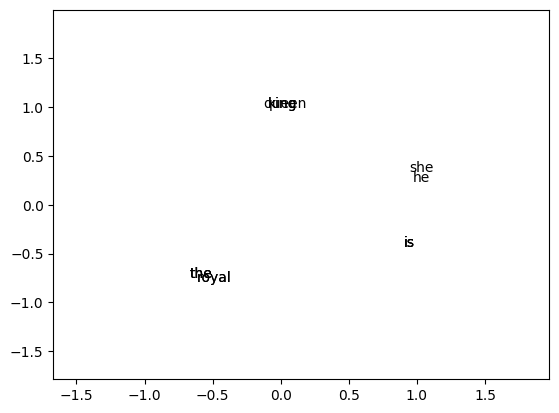

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    ax.set_xlim(min([vectors[word2int[w]][0] for w in words])-1, max([vectors[word2int[w]][0] for w in words])+1)
    ax.set_ylim(min([vectors[word2int[w]][1] for w in words])-1, max([vectors[word2int[w]][1] for w in words])+1)
plt.show()

### ***You should see something similar:***
<img src="word_2_vec_result.png">

### ***Comment on what you've understood from this course***
For example:
* What is word2vec ?
* Why is it an improvement on BoW and TF-IDF
* What is an encoder network, can you imagine an example to illustrate this notion ?

Word2Vec creates vectors for words, capturing semantic relationships.
Unlike BoW and TF-IDF, which don't capture semantics, Word2Vec understands context and meaning.
An encoder network transforms input data into a compact form called a latent representation.
Example: In a movie recommendation system, an encoder might compress a user's movie ratings into a small vector, which can then be used to find similar users.

